Importing the Dependencies

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [68]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard2.csv')

In [69]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [70]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [71]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [72]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


Saved fraud distribution plot to fraud_distribution.png


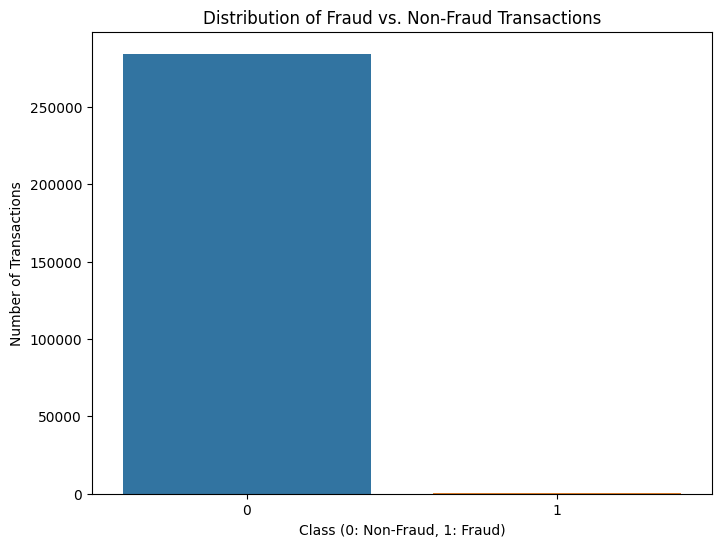

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=credit_card_data)
plt.title('Distribution of Fraud vs. Non-Fraud Transactions')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.savefig('fraud_distribution.png')
print("\nSaved fraud distribution plot to fraud_distribution.png")

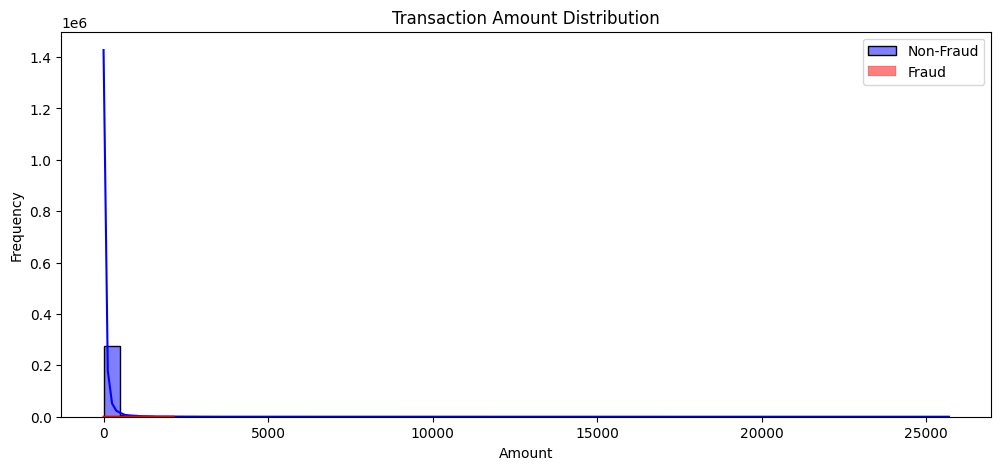

In [74]:
plt.figure(figsize=(12, 5))
sns.histplot(credit_card_data[credit_card_data['Class'] == 0]['Amount'], bins=50, color='blue', label='Non-Fraud', kde=True)
sns.histplot(credit_card_data[credit_card_data['Class'] == 1]['Amount'], bins=50, color='red', label='Fraud', kde=True)
plt.legend()
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

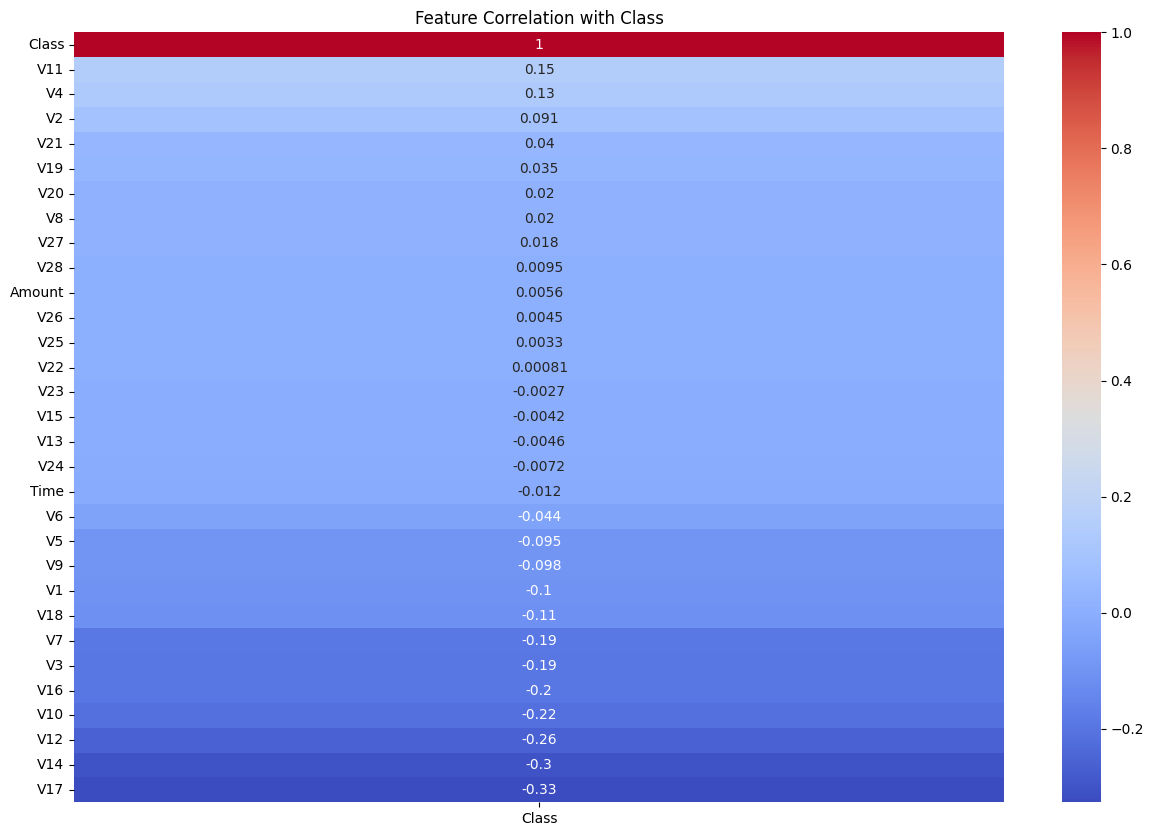

In [75]:
plt.figure(figsize=(15, 10))
corr = credit_card_data.corr()
sns.heatmap(corr[['Class']].sort_values(by='Class', ascending=False), cmap='coolwarm', annot=True)
plt.title('Feature Correlation with Class')
plt.show()

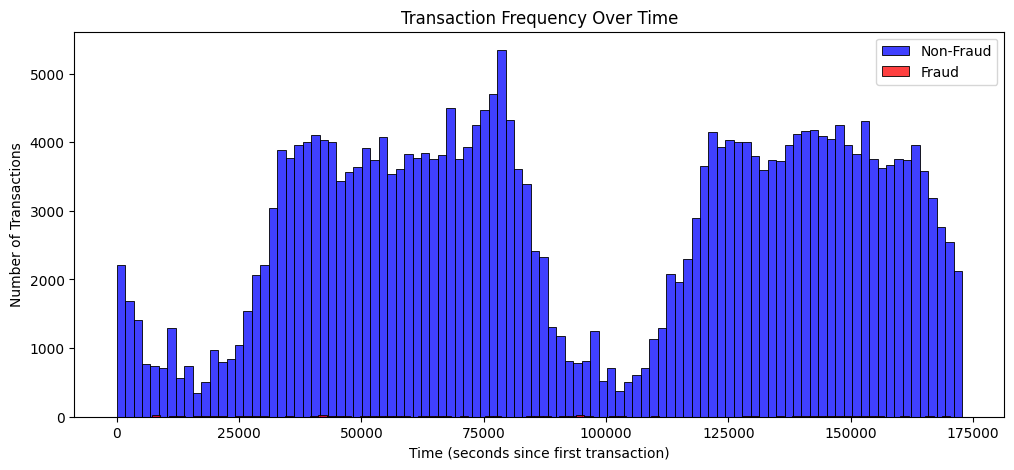

In [76]:
plt.figure(figsize=(12, 5))
sns.histplot(credit_card_data[credit_card_data['Class'] == 0]['Time'], bins=100, color='blue', label='Non-Fraud', kde=False)
sns.histplot(credit_card_data[credit_card_data['Class'] == 1]['Time'], bins=100, color='red', label='Fraud', kde=False)
plt.legend()
plt.title('Transaction Frequency Over Time')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Number of Transactions')
plt.show()

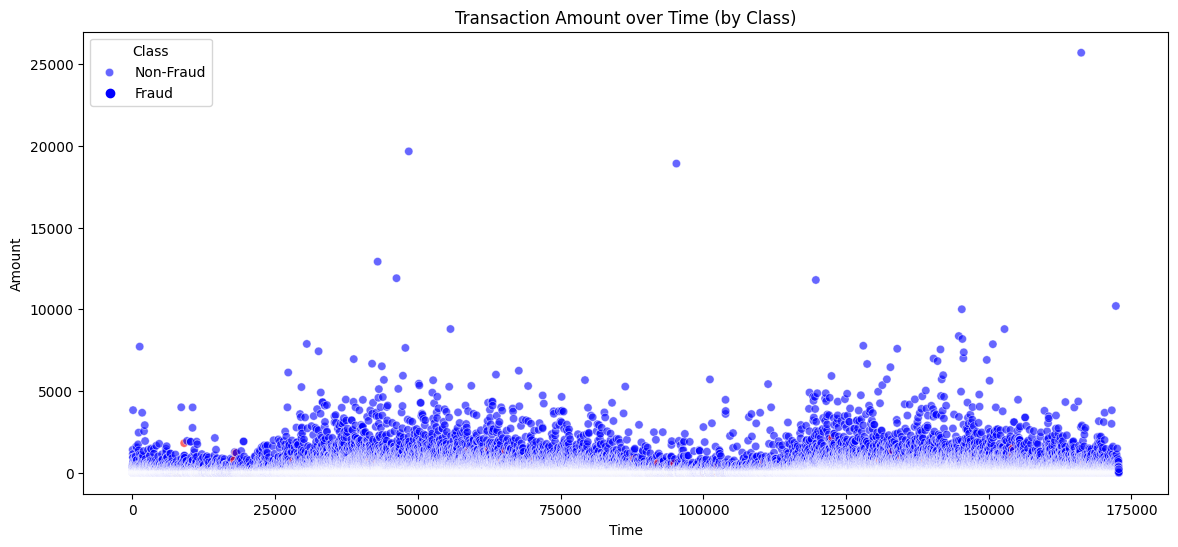

In [77]:
plt.figure(figsize=(14, 6))
sns.scatterplot(data=credit_card_data, x='Time', y='Amount', hue='Class', alpha=0.6, palette={0: 'blue', 1: 'red'})
plt.title('Transaction Amount over Time (by Class)')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend(title='Class', labels=['Non-Fraud', 'Fraud'])
plt.show()

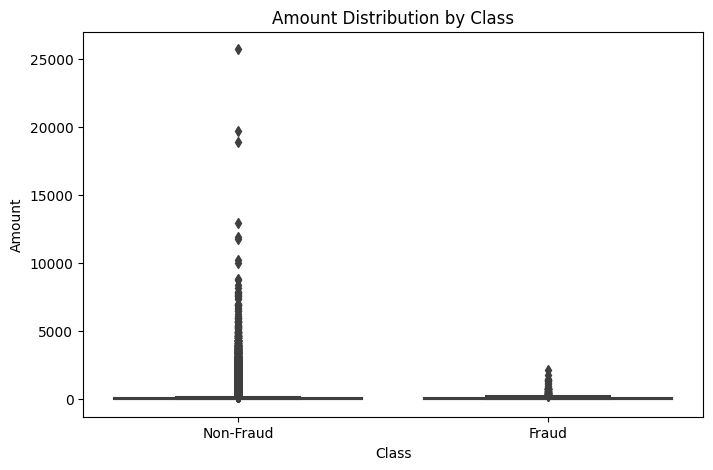

In [78]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Amount', data=credit_card_data)
plt.title('Amount Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

In [79]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [80]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [81]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [82]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [83]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [84]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

In [85]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [86]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [87]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
283893,171964.0,-1.115774,0.117469,2.831711,0.496998,-1.385031,1.792922,-1.515182,1.177430,-0.307639,...,-0.177729,0.373874,-0.319569,0.776536,0.502013,-0.207026,0.334851,0.079444,12.0,0
220276,142100.0,-0.371158,-0.995593,1.069708,-2.431163,-1.272188,-0.590400,0.125837,-0.136061,-1.909467,...,0.026984,0.213236,0.256977,-0.032192,-0.334663,-0.222246,0.112134,0.171274,158.0,0
190012,128650.0,2.169821,-0.710193,-1.434179,-1.086674,-0.261393,-0.693547,-0.390531,-0.245092,-0.935468,...,0.497377,1.399033,-0.005379,0.848071,0.212504,0.008763,-0.044347,-0.064620,25.0,0
17116,28446.0,1.383622,-1.175717,0.918430,-1.203681,-2.001060,-0.968208,-1.142280,-0.208904,-1.712054,...,-0.003333,0.324523,-0.009442,0.722069,0.298863,-0.130426,0.047189,0.040122,60.0,0
213867,139432.0,2.226907,-0.664612,-1.770590,-1.063059,0.134097,-0.541835,-0.138366,-0.365144,-0.648418,...,0.007045,0.030007,0.101696,0.131496,0.134477,-0.279484,-0.042379,-0.055473,40.0,0


In [88]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [89]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [90]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,92205.497967,0.052467,0.040768,0.107597,0.051246,0.056378,-0.020673,0.119548,0.015699,0.033513,...,0.022045,-0.011612,-0.002358,-0.001344,-0.015907,0.015020,0.047738,0.002715,0.021506,85.256382
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [91]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [92]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
283893  171964.0 -1.115774  0.117469  2.831711  0.496998 -1.385031  1.792922   
220276  142100.0 -0.371158 -0.995593  1.069708 -2.431163 -1.272188 -0.590400   
190012  128650.0  2.169821 -0.710193 -1.434179 -1.086674 -0.261393 -0.693547   
17116    28446.0  1.383622 -1.175717  0.918430 -1.203681 -2.001060 -0.968208   
213867  139432.0  2.226907 -0.664612 -1.770590 -1.063059  0.134097 -0.541835   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [93]:
print(Y)

283893    0
220276    0
190012    0
17116     0
213867    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into Training data & Testing Data

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [95]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [96]:
model = LogisticRegression()

In [97]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

Model Evaluation

Accuracy Score

In [98]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [99]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9466327827191868


In [100]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [101]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9238578680203046


In [114]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [102]:
from xgboost import XGBClassifier

# XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [103]:
X_train_prediction = xgb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [104]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [105]:
X_test_prediction = xgb.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [106]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249


In [107]:
from sklearn.model_selection import GridSearchCV


In [108]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize the model
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',     # You can also use 'roc_auc'
    cv=3,
    verbose=1,
    n_jobs=-1
)



In [109]:
grid_search.fit(X_train, Y_train)



Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='f1', verbose=1)

In [110]:
# Best model and parameters
print("Best Parameters:", grid_search.best_params_)
best_xgb = grid_search.best_estimator_

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [111]:
from xgboost import XGBClassifier

best_model = XGBClassifier(
    colsample_bytree=0.8,
    learning_rate=0.2,
    max_depth=7,
    n_estimators=200,
    subsample=1.0,
    eval_metric='logloss',
    random_state=42
)

best_model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [112]:
import joblib
joblib.dump(best_model, 'credit_card_model.pkl')


['credit_card_model.pkl']

In [113]:
from sklearn.metrics import classification_report

y_pred = best_model.predict(X_test)
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.97      0.93        99
           1       0.97      0.88      0.92        98

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



In [66]:
from sklearn.metrics import confusion_matrix, roc_auc_score
print(confusion_matrix(Y_test, y_pred))
print("ROC AUC:", roc_auc_score(Y_test, best_model.predict_proba(X_test)[:, 1]))


[[95  4]
 [ 8 90]]
ROC AUC: 0.9849515563801277
